# Stats 232A
# Project 1
### Peter Racioppo

In [2]:
# Basic imports:
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy

## Problem 1

### (High kurtosis and scale invariance, 4 points). For computational consider- ations, first convert image to grey level and re-scale the intensity to [0,31] i.e. 32 grey levels. Convolve the images with a gradient filter ∇xI, i.e. the intensity difference be- tween two adjacent (horizontally or vertically). You can either pick any single image for the following steps or accumulate the histograms (average) over the 4 images, the results should be similar for both choices.

### Loading the data

In [4]:
# Computer vision imports:
import cv2
from skimage import data, io, filters

# Read the images:
image1 = cv2.imread('natural_scene_1.jpg')
image2 = cv2.imread('natural_scene_2.jpg')
image3 = cv2.imread('natural_scene_3.jpg')
image4 = cv2.imread('natural_scene_4.jpg')

# Convert to grayscale:
gray_image_1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image_2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray_image_3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray_image_4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

# Rescale intensity from [0,255] to [0,31]:
from skimage.exposure import rescale_intensity
gray_image_1 = gray_image_1*(31/255)
gray_image_2 = gray_image_2*(31/255)
gray_image_3 = gray_image_3*(31/255)
gray_image_4 = gray_image_4*(31/255)

# Write the grayscale images to file:
cv2.imwrite('natural_scene_1_grayscale.jpg',gray_image_1)
cv2.imwrite('natural_scene_2_grayscale.jpg',gray_image_2)
cv2.imwrite('natural_scene_3_grayscale.jpg',gray_image_3)
cv2.imwrite('natural_scene_4_grayscale.jpg',gray_image_4)

True

(1200, 1600)
(768, 1024)
(992, 1168)
(1551, 3071)


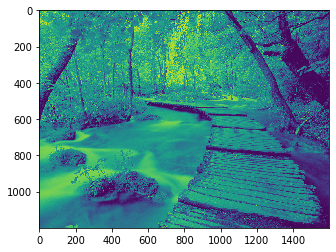

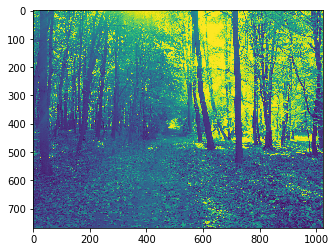

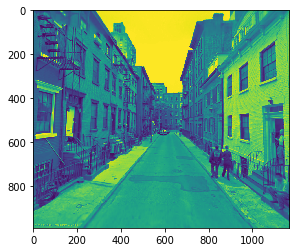

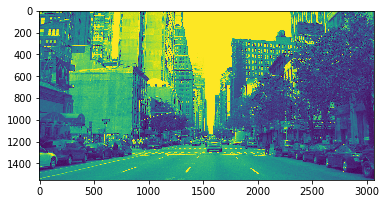

In [5]:
# Print the image dimensions:
print(np.shape(gray_image_1))
print(np.shape(gray_image_2))
print(np.shape(gray_image_3))
print(np.shape(gray_image_4))

# Display the images (now in grayscale):
imgplot = plt.imshow(gray_image_1)
plt.show()
imgplot = plt.imshow(gray_image_2)
plt.show()
imgplot = plt.imshow(gray_image_3)
plt.show()
imgplot = plt.imshow(gray_image_4)
plt.show()

### Note that these images appear green in Jupyter Notebook. However, they can easily be verified to be grayscale by opening them in a desktop app (see below):

In [195]:
# It's easy to verify that the images are in fact
# in gray scale by opening them in a desktop app:
from PIL import Image
img = Image.open('natural_scene_1_grayscale.jpg')
img.show()
img = Image.open('natural_scene_2_grayscale.jpg')
img.show()
img = Image.open('natural_scene_3_grayscale.jpg')
img.show()
img = Image.open('natural_scene_4_grayscale.jpg')
img.show()

### (1.) Plot the histogram H(a) for the difference against the horizontal axis a ∈ [−31, +31]. Then do a log-plot logH(a). [Some bins will be zero, you can assign ε for such bins in the log-plot].

max x gradient = 30.392
max y gradient = 30.0 3


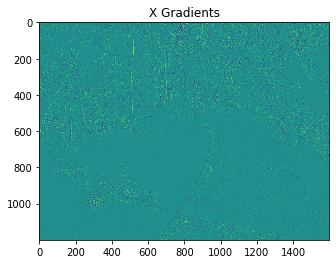

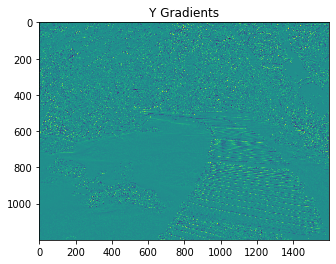

In [573]:
# Compute the gradients:
grad_mat = np.array([-1,0,1])
gradX = (cv2.filter2D(gray_image_1.T, -1, grad_mat)).T
gradY = cv2.filter2D(gray_image_1, -1, grad_mat)

# print(np.shape(gradX))
# print(np.shape(gradY))

# Print the maximum gradients:
print('max x gradient =', np.round(np.max(gradX),3))
print('max y gradient =', np.round(np.max(gradY)),3)

# Plot the gradient images:
imgplot = plt.imshow(gradX)
plt.title('X Gradients')
plt.show()
imgplot = plt.imshow(gradY)
plt.title('Y Gradients')
plt.show()

### Note: In these gradient images, vertical lines are clearly discernible for the x-gradients and horizontal lines are more prominent in the y-gradients.

In [611]:
# Flatten the matrices of derivatives into arrays:
sx_1 = np.ndarray.flatten(gradX)
sy_1 = np.ndarray.flatten(gradY)

# Plot histogram of x gradients:
frq_x, edges_x = np.histogram(sx_1, bins='auto')
frq_x_n = frq_x/np.max(frq_x)
bin_width_x = edges_x[1] - edges_x[0]
edges_x_shifted = edges_x[1:] - bin_width_x

# Plot histogram of y gradients:
frq_y, edges_y = np.histogram(sy_1, bins='auto')
frq_y_n = frq_y/np.max(frq_y)
bin_width_y = edges_y[1] - edges_y[0]
edges_y_shifted = edges_y[1:] - bin_width_y

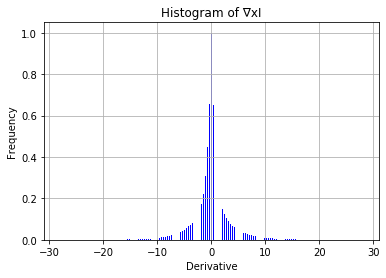

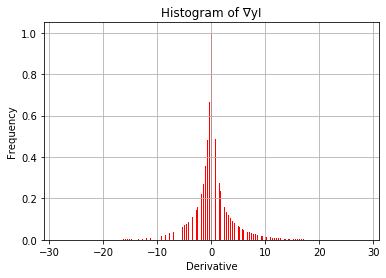

In [568]:
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge",color="blue")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇xI')
plt.grid()
plt.show()

plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇yI')
plt.grid()
plt.show()

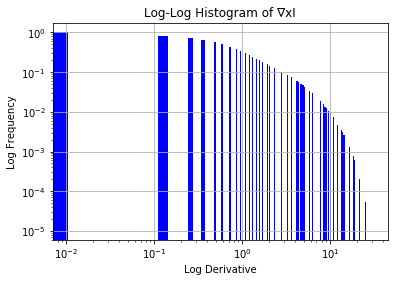

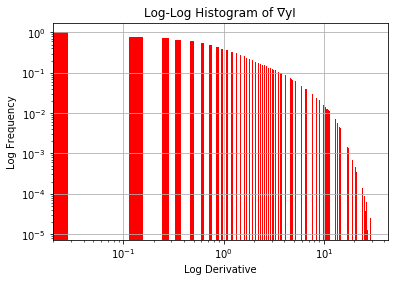

In [520]:
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge",color="blue")
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel('Log Derivative')
plt.ylabel('Log Frequency')
plt.title('Log-Log Histogram of ∇xI')
plt.grid()
plt.show()

plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge",color="red")
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel('Log Derivative')
plt.ylabel('Log Frequency')
plt.title('Log-Log Histogram of ∇yI')
plt.grid()
plt.show()

In [471]:
# plt.plot(edges_x_shifted, log_gaussian(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
# hist, bin_edges = np.histogram(sx_1, bins = 200)
# plt.hist(sx_1, bin_edges,log=True,color='blue')
# plt.gca().set_xscale("log")
# plt.xlabel('Log Derivative')
# plt.ylabel('Log Frequency')
# plt.title('Log-Log Histogram of ∇xI and Gaussian Fit')
# plt.grid()
# plt.show()

# plt.plot(edges_y_shifted, log_gaussian(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
# hist, bin_edges = np.histogram(sy_1, bins = 200)
# plt.hist(sy_1, bin_edges,log=True,color='red')
# plt.gca().set_xscale("log")
# plt.xlabel('Log Derivative')
# plt.ylabel('Log Frequency')
# plt.title('Log-Log Histogram of ∇yI and Gaussian Fit')
# plt.grid()
# plt.show()

### Repeating (1.) using Sobel filters:

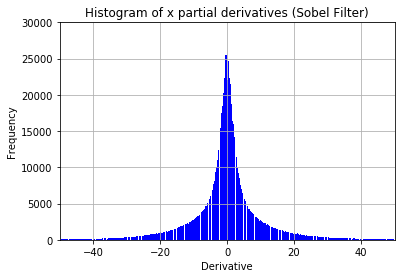

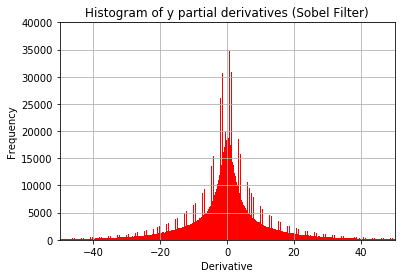

In [595]:
# Compute the gradients by convolving a Sobel kernel:
sobelx_1 = cv2.Sobel(gray_image_1,cv2.CV_64F,1,0,ksize=3)
sobely_1 = cv2.Sobel(gray_image_1,cv2.CV_64F,0,1,ksize=3)

# Flatten the matrices of derivatives into arrays:
sx_1 = np.ndarray.flatten(sobelx_1)
sy_1 = np.ndarray.flatten(sobely_1)

# Plot histogram of x gradients:
plt.hist(sx_1, bins='auto', color='blue')
plt.xlim(-50, 50)
plt.ylim(0, 30000)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of x partial derivatives (Sobel Filter)')
plt.grid()
plt.show()

# Plot histogram of y gradients:
plt.hist(sy_1, bins='auto', color="red")
plt.xlim(-50, 50)
plt.ylim(0, 40000)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of y partial derivatives (Sobel Filter)')
plt.grid()
plt.show()

### Note: Sobel filters appear to be more robust than my naive, single-dimensional gradient convolution kernels, as evidenced by the improved density of the histograms.

### (2.) Compute the mean, variance, and kurtosis for this histogram [Report the numeric numbers in your report].

In [415]:
import scipy.stats

# Compute the mean:
sx_mean = np.mean(sx_1)
sy_mean = np.mean(sy_1)

print("∇xI mean = ", np.round(sx_mean,3))
print("∇yI mean = ", np.round(sy_mean,3))

# Compute the variance:
sx_var = np.var(sx_1)
sy_var = np.var(sy_1)

print("∇xI variance = ", np.round(sx_var,3))
print("∇yI variance = ", np.round(sy_var,3))

# Compute the kurtosis:
sx_kurt = scipy.stats.kurtosis(sx_1)
sy_kurt = scipy.stats.kurtosis(sy_1)

print("∇xI kurtosis = ", np.round(sx_kurt,3))
print("∇yI kurtosis = ", np.round(sy_kurt,3))

∇xI mean =  -0.015
∇yI mean =  -0.006
∇xI variance =  11.882
∇yI variance =  14.783
∇xI kurtosis =  5.762
∇yI kurtosis =  4.064


### Note: The gradients have means of about zero, which of course makes sense.

### (3.) Fit this histogram to a Generalized Gaussian distribution e^(|a/σ|^γ) and plot the fitted curves super-imposed against the histogram. What is the value of γ in the fitted generalized Gaussian?

In [461]:
from numpy import exp, linspace, random
from scipy.optimize import curve_fit
import scipy.special

def gen_gaussian(x, mu, sigma, gamma):
     return np.exp(-(np.abs(x-mu)/sigma)**gamma)

def log_gen_gaussian(x, mu, sigma, gamma):
     return -(np.abs(x-mu)/sigma)**gamma

eps = 0.0008
x = edges_x_shifted
y = np.log(frq_x+eps)

init_vals = [0, np.sqrt(sx_var), 2]  # for [mu, sigma, gamma]
best_vals_x, covar = curve_fit(log_gen_gaussian, x, y, p0=init_vals)
best_vals_x = np.round(best_vals_x,3)
print('best vals x: {}'.format(best_vals_x))

eps = 0.0001
x = edges_y_shifted
y = np.log(frq_y+eps)

init_vals = [0, np.sqrt(sy_var), 2]  # for [mu, sigma, gamma]
best_vals_y, covar = curve_fit(log_gen_gaussian, x, y, p0=init_vals)
best_vals_y = np.round(best_vals_y,3)
print('best vals y: {}'.format(best_vals_y))

best vals x: [-0.023  0.362  0.38 ]
best vals y: [0.329 0.646 0.477]


gamma_x =  0.38
gamma_y =  0.477


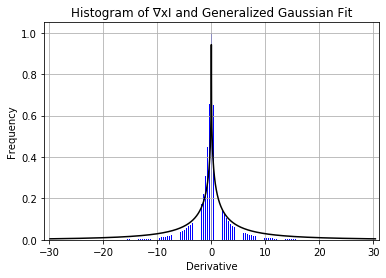

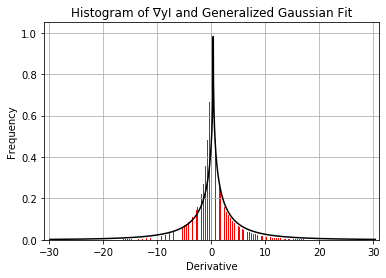

In [517]:
print("gamma_x = ", np.round(best_vals_x[2],3))
print("gamma_y = ", np.round(best_vals_y[2],3))

plt.plot(edges_x_shifted,gen_gaussian(edges_x_shifted, best_vals_x[0], best_vals_x[1], best_vals_x[2]), color='black')
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge",color="blue")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇xI and Generalized Gaussian Fit')
plt.grid()
plt.show()

plt.plot(edges_y_shifted,gen_gaussian(edges_y_shifted, best_vals_y[0], best_vals_y[1], best_vals_y[2]), color='black')
plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇yI and Generalized Gaussian Fit')
plt.grid()
plt.show()

### Note: The best-fit gamma values are less than 1, resulting in a sharper peak than a Gaussian distribution.

### (4.) Plot the Gaussian distribution using the mean and the variance above, and super- impose this plot with the plots in step (1) above (i.e. plot the Gaussian and its log plot, this is easy to do in matlab).

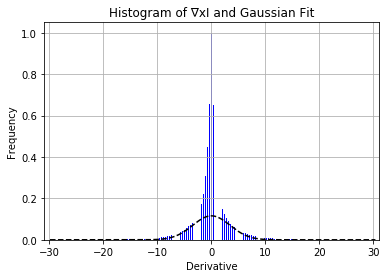

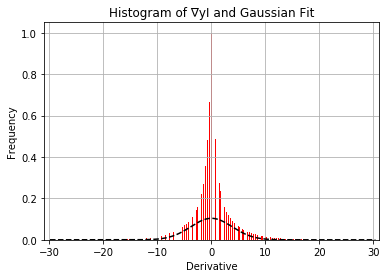

In [480]:
def gaussian(x, mu, sigma):
     return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(edges_x_shifted, gaussian(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
# plt.plot(edges_x_shifted, scipy.stats.norm.pdf(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge", color="blue")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇xI and Gaussian Fit')
plt.grid()
plt.show()

plt.plot(edges_y_shifted, gaussian(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
# plt.plot(edges_y_shifted, scipy.stats.norm.pdf(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge", color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇yI and Gaussian Fit')
plt.grid()
plt.show()

### Note: The non-generalized Gaussian fits are not able to well-represent the sharp peak in the data around zero.

In [511]:
# plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge", color="blue")
# plt.plot(edges_x_shifted, gaussian(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
# plt.gca().set_xscale("log")
# plt.gca().set_yscale("log")
# plt.xlabel('Log Derivative')
# plt.ylabel('Log Frequency')
# plt.title('Log-Log Histogram of ∇xI with Gaussian Fit')
# plt.grid()
# plt.show()

# plt.plot(edges_y_shifted, np.log(scipy.stats.norm.pdf(edges_y_shifted, sy_mean, np.sqrt(sy_var))), '--', color='black')
# plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge", color="red")
# plt.plot(edges_y_shifted, gaussian(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
# plt.gca().set_xscale("log")
# plt.gca().set_yscale("log")
# plt.xlabel('Log Derivative')
# plt.ylabel('Log Frequency')
# plt.title('Log-Log Histogram of ∇yI with Gaussian Fit')
# plt.grid()
# plt.show()

### Note: For some reason, python cuts off the end of the histogram when overlaying the fit curve.

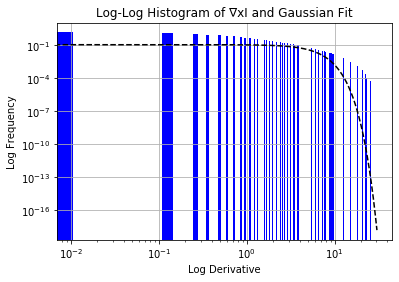

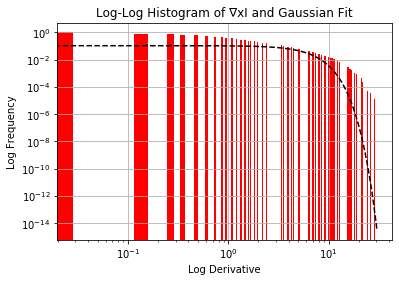

In [509]:
plt.plot(edges_x_shifted, gaussian(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
plt.hist(sx_1,edges_x_shifted, log=True, color='blue',density=True)
plt.gca().set_xscale("log")
plt.xlabel('Log Derivative')
plt.ylabel('Log Frequency')
plt.title('Log-Log Histogram of ∇xI and Gaussian Fit')
plt.grid()
plt.show()

plt.plot(edges_y_shifted, gaussian(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
plt.hist(sy_1,edges_y_shifted, log=True, color='red',density=True)
plt.gca().set_xscale("log")
plt.xlabel('Log Derivative')
plt.ylabel('Log Frequency')
plt.title('Log-Log Histogram of ∇xI and Gaussian Fit')
plt.grid()
plt.show()

### (5.) Down-sample your image(s) by a 2 × 2 average (or simply sub-sample) the image. Plot the histogram and log histogram, and impose with the plots in step 1, to compare the difference. Repeat this down-sampling process 2-3 times.

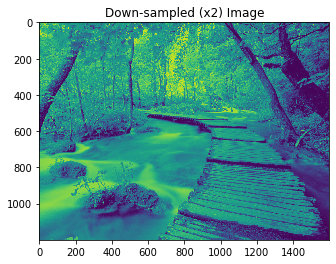

In [575]:
samp_mat = np.ones(shape = (2,2))/4
down_samp_1 = cv2.filter2D(gray_image_1, -1, samp_mat)

# Plot the down-sampled imaged:
imgplot = plt.imshow(down_samp_1)
plt.title('Down-sampled (x2) Image')
plt.show()

# Compute the gradients:
grad_mat = np.array([-1,0,1])
gradX = (cv2.filter2D(down_samp_1.T, -1, grad_mat)).T
gradY = cv2.filter2D(down_samp_1, -1, grad_mat)

In [576]:
# Flatten the matrices of derivatives into arrays:
sx_1 = np.ndarray.flatten(gradX)
sy_1 = np.ndarray.flatten(gradY)

# Plot histogram of x gradients:
frq_x_a, edges_x_a = np.histogram(sx_1, bins='auto')
frq_x_n_a = frq_x_a/np.max(frq_x_a)
bin_width_x_a = edges_x_a[1] - edges_x_a[0]
edges_x_shifted_a = edges_x_a[1:] - bin_width_x_a

# Plot histogram of y gradients:
frq_y_a, edges_y_a = np.histogram(sy_1, bins='auto')
frq_y_n_a = frq_y_a/np.max(frq_y_a)
bin_width_y_a = edges_y_a[1] - edges_y_a[0]
edges_y_shifted_a = edges_y_a[1:] - bin_width_y_a

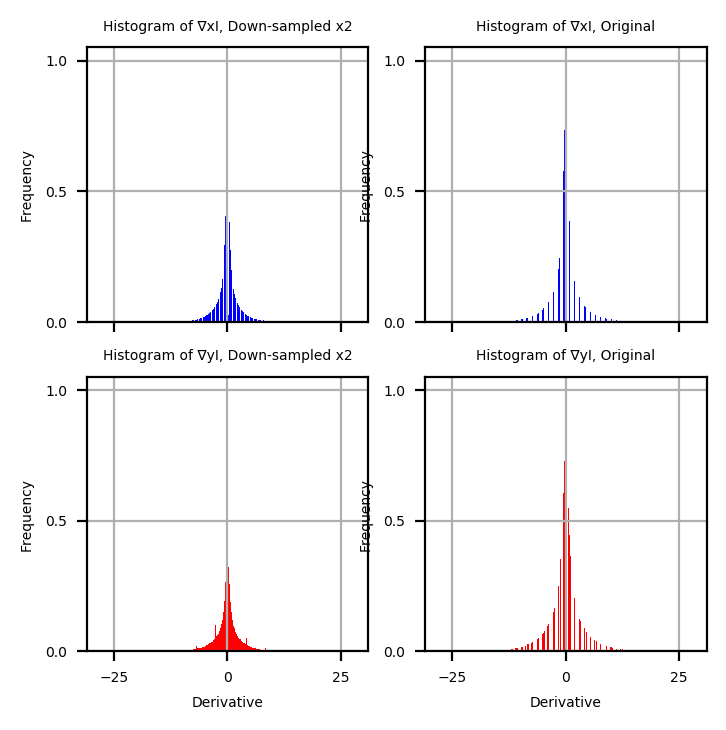

In [578]:
f = plt.figure(figsize=(4,4),dpi=200)
plt.subplot(221)
plt.bar(edges_x_shifted_a, frq_x_n_a, width=np.diff(edges_x_a), align="edge",color="blue")
plt.xlim(-31, 31)
# plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇xI, Down-sampled x2',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tick_params(labelbottom=False)
plt.grid()

plt.subplot(222)
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge",color="blue")
plt.xlim(-31, 31)
# plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇xI, Original',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tick_params(labelbottom=False)
plt.grid()

plt.subplot(223)
plt.bar(edges_y_shifted_a, frq_y_n_a, width=np.diff(edges_y_a), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇yI, Down-sampled x2',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.grid()

plt.subplot(224)
plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇yI, Original',size=5)
plt.grid()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.show()

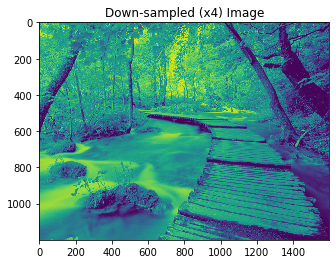

In [581]:
samp_mat = np.ones(shape = (2,2))/4
down_samp_2 = cv2.filter2D(down_samp_1, -1, samp_mat)

# Plot the down-sampled imaged:
imgplot = plt.imshow(down_samp_2)
plt.title('Down-sampled (x4) Image')
plt.show()

# Compute the gradients:
grad_mat = np.array([-1,0,1])
gradX = (cv2.filter2D(down_samp_2.T, -1, grad_mat)).T
gradY = cv2.filter2D(down_samp_2, -1, grad_mat)

In [582]:
# Flatten the matrices of derivatives into arrays:
sx_1 = np.ndarray.flatten(gradX)
sy_1 = np.ndarray.flatten(gradY)

# Plot histogram of x gradients:
frq_x_a, edges_x_a = np.histogram(sx_1, bins='auto')
frq_x_n_a = frq_x_a/np.max(frq_x_a)
bin_width_x_a = edges_x_a[1] - edges_x_a[0]
edges_x_shifted_a = edges_x_a[1:] - bin_width_x_a

# Plot histogram of y gradients:
frq_y_a, edges_y_a = np.histogram(sy_1, bins='auto')
frq_y_n_a = frq_y_a/np.max(frq_y_a)
bin_width_y_a = edges_y_a[1] - edges_y_a[0]
edges_y_shifted_a = edges_y_a[1:] - bin_width_y_a

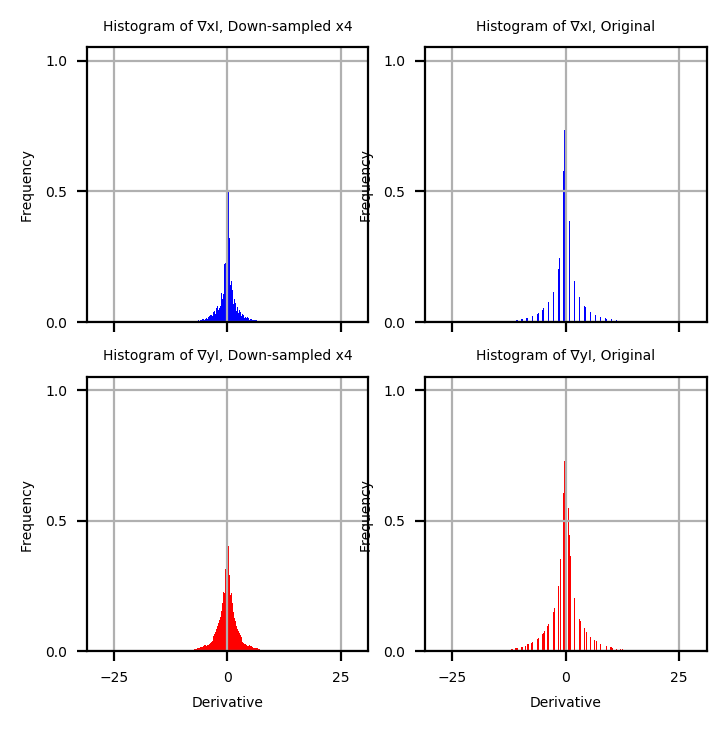

In [584]:
f = plt.figure(figsize=(4,4),dpi=200)
plt.subplot(221)
plt.bar(edges_x_shifted_a, frq_x_n_a, width=np.diff(edges_x_a), align="edge",color="blue")
plt.xlim(-31, 31)
# plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇xI, Down-sampled x4',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tick_params(labelbottom=False)
plt.grid()

plt.subplot(222)
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge",color="blue")
plt.xlim(-31, 31)
# plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇xI, Original',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tick_params(labelbottom=False)
plt.grid()

plt.subplot(223)
plt.bar(edges_y_shifted_a, frq_y_n_a, width=np.diff(edges_y_a), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇yI, Down-sampled x4',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.grid()

plt.subplot(224)
plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇yI, Original',size=5)
plt.grid()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.show()

### Note: Downsampling appears to increase the density of the gradient histograms and concentrate their distributions around zero.

### (6.) Synthesize a uniform noise image, i.e. each pixel is drawn independently from a uniform number in [0, 31]. Repeat 1-2-4 to compare the difference between a noise image and a natural image. Do a 2 × 2 average instead of sub-sampling.

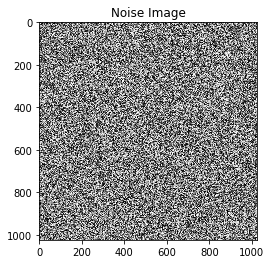

In [625]:
noise_mat = np.reshape(np.random.uniform(0,31,1024**2),(1024,1024))

# Plot the noise image:
imgplot = plt.imshow(noise_mat, cmap='gray')
plt.title('Noise Image')
plt.show()

max x gradient = 30.94
max y gradient = 31.0 3


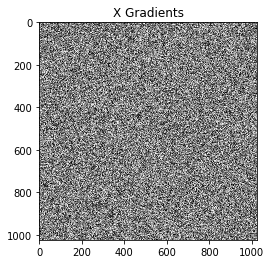

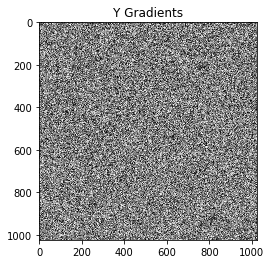

In [626]:
# Compute the gradients:
grad_mat = np.array([-1,0,1])
gradX = (cv2.filter2D(noise_mat.T, -1, grad_mat)).T
gradY = cv2.filter2D(noise_mat, -1, grad_mat)

# print(np.shape(gradX))
# print(np.shape(gradY))

# Print the maximum gradients:
print('max x gradient =', np.round(np.max(gradX),3))
print('max y gradient =', np.round(np.max(gradY)),3)

# Plot the gradient images:
imgplot = plt.imshow(gradX, cmap='gray')
plt.title('X Gradients')
plt.show()
imgplot = plt.imshow(gradY, cmap='gray')
plt.title('Y Gradients')
plt.show()

### Note: The gradients are indescernible from the original noise.

In [627]:
# Flatten the matrices of derivatives into arrays:
sx_1 = np.ndarray.flatten(gradX)
sy_1 = np.ndarray.flatten(gradY)

# Plot histogram of x gradients:
frq_x, edges_x = np.histogram(sx_1, bins='auto')
frq_x_n = frq_x/np.max(frq_x)
bin_width_x = edges_x[1] - edges_x[0]
edges_x_shifted = edges_x[1:] - bin_width_x

# Plot histogram of y gradients:
frq_y, edges_y = np.histogram(sy_1, bins='auto')
frq_y_n = frq_y/np.max(frq_y)
bin_width_y = edges_y[1] - edges_y[0]
edges_y_shifted = edges_y[1:] - bin_width_y

In [628]:
import scipy.stats

# Compute the mean:
sx_mean = np.mean(sx_1)
sy_mean = np.mean(sy_1)

print("∇xI mean = ", np.round(sx_mean,3))
print("∇yI mean = ", np.round(sy_mean,3))

# Compute the variance:
sx_var = np.var(sx_1)
sy_var = np.var(sy_1)

print("∇xI variance = ", np.round(sx_var,3))
print("∇yI variance = ", np.round(sy_var,3))

# Compute the kurtosis:
sx_kurt = scipy.stats.kurtosis(sx_1)
sy_kurt = scipy.stats.kurtosis(sy_1)

print("∇xI kurtosis = ", np.round(sx_kurt,3))
print("∇yI kurtosis = ", np.round(sy_kurt,3))

∇xI mean =  -0.0
∇yI mean =  -0.001
∇xI variance =  159.691
∇yI variance =  159.84
∇xI kurtosis =  -0.593
∇yI kurtosis =  -0.596


### Note: The means for the gradients of the noise images are still near zero (in fact, closer to zero than the natural images), but the variances are much larger than for the natural images. Kurtosis is much lower than in the natural images.

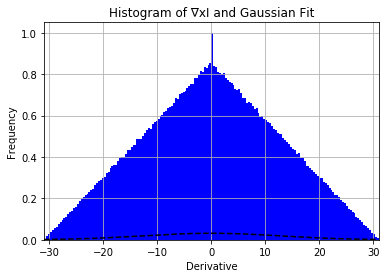

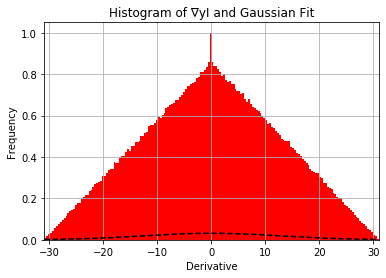

In [629]:
def gaussian(x, mu, sigma):
     return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(edges_x_shifted, gaussian(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
# plt.plot(edges_x_shifted, scipy.stats.norm.pdf(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge", color="blue")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇xI and Gaussian Fit')
plt.grid()
plt.show()

plt.plot(edges_y_shifted, gaussian(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
# plt.plot(edges_y_shifted, scipy.stats.norm.pdf(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge", color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative')
plt.ylabel('Frequency')
plt.title('Histogram of ∇yI and Gaussian Fit')
plt.grid()
plt.show()

### Note: These data are not well-represented by the Gaussian fits, and follow a much different distribution than the natural images, with greater spread.

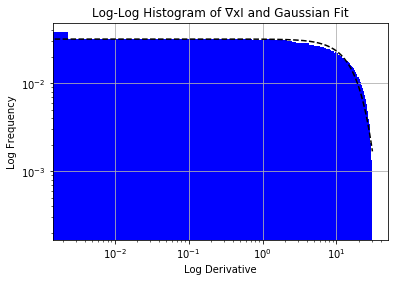

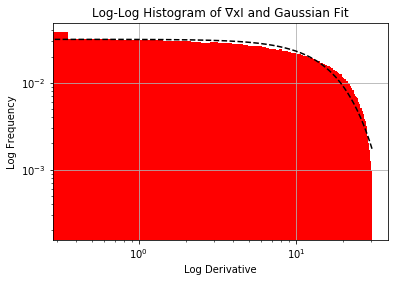

In [621]:
plt.plot(edges_x_shifted, gaussian(edges_x_shifted, sx_mean, np.sqrt(sx_var)), '--', color='black')
plt.hist(sx_1,edges_x_shifted, log=True, color='blue',density=True)
plt.gca().set_xscale("log")
plt.xlabel('Log Derivative')
plt.ylabel('Log Frequency')
plt.title('Log-Log Histogram of ∇xI and Gaussian Fit')
plt.grid()
plt.show()

plt.plot(edges_y_shifted, gaussian(edges_y_shifted, sy_mean, np.sqrt(sy_var)), '--', color='black')
plt.hist(sy_1,edges_y_shifted, log=True, color='red',density=True)
plt.gca().set_xscale("log")
plt.xlabel('Log Derivative')
plt.ylabel('Log Frequency')
plt.title('Log-Log Histogram of ∇xI and Gaussian Fit')
plt.grid()
plt.show()

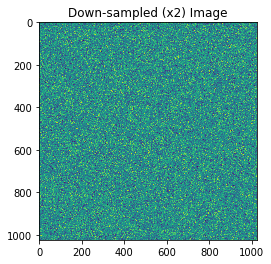

In [622]:
samp_mat = np.ones(shape = (2,2))/4
down_samp_noise = cv2.filter2D(noise_mat, -1, samp_mat)

# Plot the down-sampled imaged:
imgplot = plt.imshow(down_samp_noise)
plt.title('Down-sampled (x2) Image')
plt.show()

# Compute the gradients:
grad_mat = np.array([-1,0,1])
gradX = (cv2.filter2D(down_samp_noise.T, -1, grad_mat)).T
gradY = cv2.filter2D(down_samp_noise, -1, grad_mat)

In [630]:
# Flatten the matrices of derivatives into arrays:
sx_1 = np.ndarray.flatten(gradX)
sy_1 = np.ndarray.flatten(gradY)

# Plot histogram of x gradients:
frq_x_n, edges_x_n = np.histogram(sx_1, bins='auto')
frq_x_n_n = frq_x_n/np.max(frq_x_n)
bin_width_x_n = edges_x_n[1] - edges_x_n[0]
edges_x_shifted_n = edges_x_n[1:] - bin_width_x_n

# Plot histogram of y gradients:
frq_y_n, edges_y_n = np.histogram(sy_1, bins='auto')
frq_y_n_n = frq_y_n/np.max(frq_y_n)
bin_width_y_n = edges_y_n[1] - edges_y_n[0]
edges_y_shifted_n = edges_y_n[1:] - bin_width_y_n

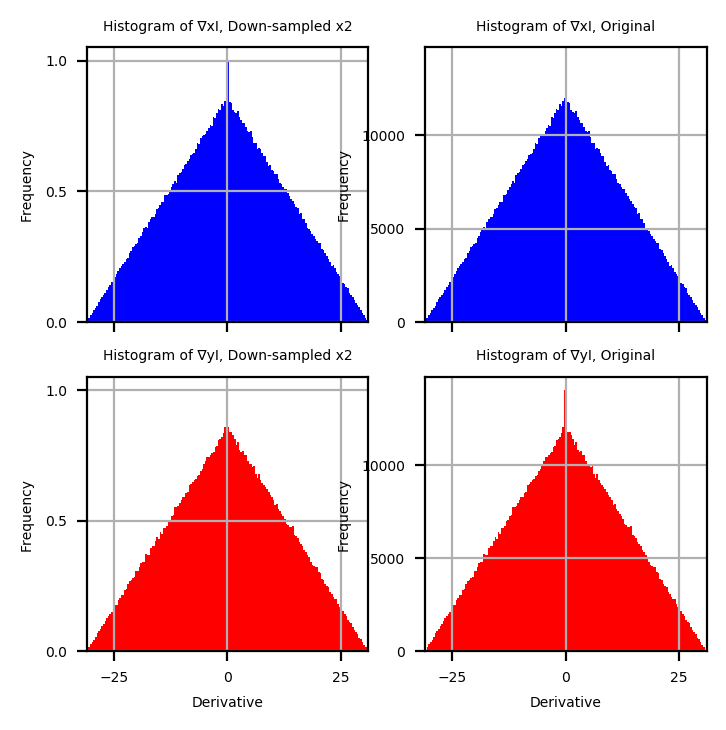

In [631]:
f = plt.figure(figsize=(4,4),dpi=200)
plt.subplot(221)
plt.bar(edges_x_shifted_n, frq_x_n_n, width=np.diff(edges_x_n), align="edge", color="blue")
plt.xlim(-31, 31)
# plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇xI, Down-sampled x2',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tick_params(labelbottom=False)
plt.grid()

plt.subplot(222)
plt.bar(edges_x_shifted, frq_x_n, width=np.diff(edges_x), align="edge", color="blue")
plt.xlim(-31, 31)
# plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇xI, Original',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tick_params(labelbottom=False)
plt.grid()

plt.subplot(223)
plt.bar(edges_y_shifted_n, frq_y_n_n, width=np.diff(edges_y_n), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇yI, Down-sampled x2',size=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.grid()

plt.subplot(224)
plt.bar(edges_y_shifted, frq_y_n, width=np.diff(edges_y), align="edge",color="red")
plt.xlim(-31, 31)
plt.xlabel('Derivative',size=5)
plt.ylabel('Frequency',size=5)
plt.title('Histogram of ∇yI, Original',size=5)
plt.grid()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.show()

### Note: Downsampling appears to have no effect.

## Problem 2

### (Verify the 1/f-power law observation in natural images, 3 points). Do an FFT (Fast Fourier Transform) on the grey image I which returns a Fourier image ˆ(ξ,η) which is complex number matrix indexed by (ξ,η) for its horizontal and vertical frequencies. Compute the amplitude (modulus) of each complex number A(ξ, η). Denote the frequency ρ = sqrt(ξ2 + η2), and transfer to a polar coordinate, and we calculate the total Fourier power A2(ρ) for each frequency (i.e. you need to discretize ρ, and calculate the A2(ρ) averaged over the ring for each ρ, stop ρ when the circle hits the boundary of the Fourier image).

In [7]:
def f_Fourier_Power(image):

    min_dim = np.min(np.shape(image))
    
    FFT = scipy.fftpack.fft2(image) # Fast Fourier transform
    A = np.absolute(FFT) # Matrix of moduli

#     # Plot the FFT:
#     Test = np.log(A)*31/np.max(np.log(A))
#     print(Test)
#     imgplot = plt.imshow(Test, cmap='gray')
#     plt.show()
    
    # Matrix of ρ values:
    Rho = np.zeros((min_dim,min_dim))
    for i in np.arange(min_dim):
            for j in np.arange(min_dim):
                Rho[i,j] = np.sqrt((i+1)**2+(j+1)**2)

    step = 2 # Step size
    # A2 = A[0:min_dim,0:min_dim]*A[0:min_dim,0:min_dim] # A squared
    Avg = np.zeros(np.int(min_dim/step))
    prange = np.arange(np.int(min_dim/step))
    for i in prange:
        Mati = ((Rho >= i)*1)*((Rho <= (i+step))*1)
        In = A[0:min_dim,0:min_dim]*Mati
        Avg[i] = np.sum(In)/np.count_nonzero(In)
    
    return(prange, Avg)

In [8]:
prange1, Avg1 = f_Fourier_Power(gray_image_1)
prange2, Avg2 = f_Fourier_Power(gray_image_2)
prange3, Avg3 = f_Fourier_Power(gray_image_3)
prange4, Avg4 = f_Fourier_Power(gray_image_4)

<function matplotlib.pyplot.show(*args, **kw)>

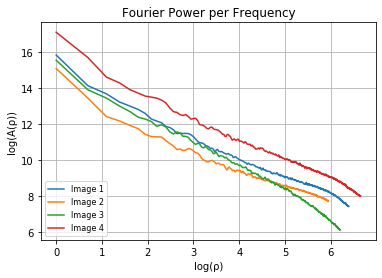

In [674]:
plt.plot(np.log(prange1[1:]),np.log(Avg1[1:]))
plt.plot(np.log(prange2[1:]),np.log(Avg2[1:]))
plt.plot(np.log(prange3[1:]),np.log(Avg3[1:]))
plt.plot(np.log(prange4[1:]),np.log(Avg4[1:]))
plt.xlabel('log(ρ)')
plt.ylabel('log(A(ρ))')
plt.title('Fourier Power per Frequency')
plt.legend(('Image 1','Image 2','Image 3','Image 4'),loc='lower left',fontsize=8)
plt.grid()
plt.show

### Note: log-log trend-lines appear approximately linear.

### (2.) Compute the integration (summation in discrete case) of S(ρ0) = integral(A2(ξ,η)dξdη) over the domain Ω(ρ0)={(ξ,η):ρ0 ≤sqrt(ξ^2 +η^2) ≤2ρ0}. Plot S(ρ0) over ρ0. The plot should fit to a horizontal line (with fluctuation) as S(ρ0) is supposed to be a constant over ρ0.

In [49]:
min_dim = np.min(np.shape(gray_image_1))
FFT = scipy.fftpack.fft2(gray_image_1) # Fast Fourier transform
A = np.absolute(FFT) # Matrix of moduli
A2 = A[0:min_dim,0:min_dim]*A[0:min_dim,0:min_dim] # A squared
# A2 = np.matmul(A[0:min_dim,0:min_dim],A[0:min_dim,0:min_dim])

# Matrix of ρ values:
Rho = np.zeros((min_dim,min_dim))
for i in np.arange(min_dim):
        for j in np.arange(min_dim):
            Rho[i,j] = np.sqrt((i+1)**2+(j+1)**2)

prange = np.arange(np.int(np.floor(min_dim/2)))
Sum = np.zeros(np.int(np.floor(min_dim/2)))
for i in prange:
    Mati = ((Rho >= i)*1)*((Rho <= (2*i))*1)
    In = A2*Mati
    Sum[i] = np.sum(In)

# step = 2
# prange = np.arange(np.int(np.floor((min_dim/2)*step)))
# Sum = np.zeros(np.int(np.floor((min_dim/2)*step)))/step
# for i in prange:
#     Mati = ((Rho >= i/step)*1)*((Rho <= (2*i/step))*1)
#     In = A2*Mati
#     Sum[i] = np.sum(In)

<function matplotlib.pyplot.show(*args, **kw)>

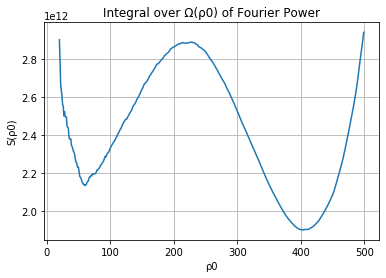

In [50]:
start = 20
stop = -100
# plt.plot(prange,Sum)
plt.plot(prange[start:stop],Sum[start:stop])
plt.xlabel('ρ0')
plt.ylabel('S(ρ0)')
plt.title('Integral over Ω(ρ0) of Fourier Power')
# plt.ylim(0, 6e12)
plt.grid()
plt.show

### Note: There appears to be a large amount of oscillatory behavior, especially near the frequency bounds.

## Problem 3

### (A 2D scale invariant world, 3 points). Suppose we simulate a toy 2D world where the images consist of only 1D line segments. In an image, a line segment is represented by its center (xi,yi), orientation θi and length ri. The line segments are independently distributed with uniform probability for their centers and orientations. The length follows a probability p(r) ∝ 1/r3, i.e. a cubic power law. You may control the density of line by a Poisson distribution. That is, in each unit area, the number of line segments has a certain constant mean. [Hint: How to sample r from p(r)? Calculate the Cumulative Distribution function of p(r), then draw a random number in [0,1].]

### (1.) Simulate 1 image I1 of size 1024 × 1024 pixels with a total N lines. (You need to record all the N lines whose centers are within a range of the image, truncate long lines and hide (discard) lines shorter than a pixel.)

In [832]:
dim = 3
scale = 2**dim
a = 0
b = 1024*scale-1
eps = 0.01
N = 1000 # Number of lines
x = np.random.randint(a,b,N) # X position
y = np.random.randint(a,b,N) # Y position
theta = np.random.uniform(0,np.pi,N) # Line angle
# Sample from 1/r^3 using the inversion method:
u = np.random.uniform(0,1,N)
L_u = eps*((1/np.sqrt(1-u))-1)
L = np.round(5*b*L_u) # Length
# L = L[L != 0]
slope = np.tan(theta)

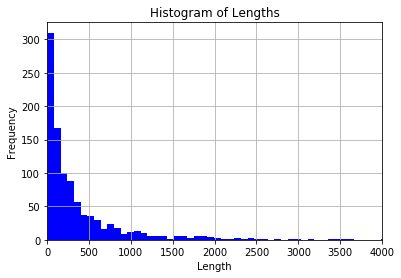

In [833]:
# Checking that the lengths follow a 1/r^3 distribution:
# hist, bin_edges = np.histogram(L_u, bins = 'auto')
# plt.hist(L_u, bin_edges, color='blue')
hist, bin_edges = np.histogram(L, bins = 'auto')
plt.hist(L, bin_edges, color='blue')
# x = np.arange(np.max(L_u)-1)+1
# plt.plot(x,(x+eps)**-3)
# plt.gca().set_xscale("log")
# plt.gca().set_yscale("log")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Histogram of Lengths')
plt.xlim(0, 4000)
plt.grid()
plt.show()

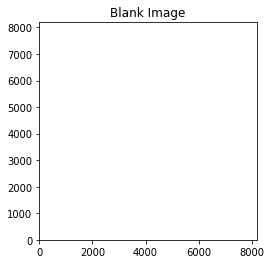

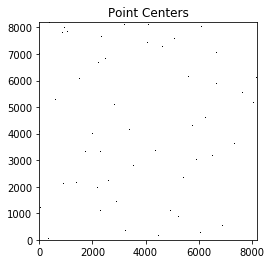

In [922]:
img_bw = np.ones([b+1,b+1], dtype=np.uint8)*31
img_bw_1 = img_bw
img_bw_2 = img_bw
img_bw_3 = img_bw

plt.imshow(img_bw, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.title('Blank Image')
plt.show()

for i in np.arange(N):
    for j in (np.arange(8)-np.int(8/2)):
        for k in (np.arange(8)-np.int(8/2)):
            if L[i] >= 8:
                img_bw_1[x[i]+j,y[i]+k]=0
                
for i in np.arange(N):
    for j in (np.arange(4)-np.int(4/2)):
        for k in (np.arange(4)-np.int(4/2)):
            if L[i] >= 4:
                img_bw_2[x[i]+j,y[i]+k]=0

for i in np.arange(N):
    for j in (np.arange(2)-np.int(2/2)):
        for k in (np.arange(2)-np.int(2/2)):
            if L[i] >= 2:
                img_bw_3[x[i]+j,y[i]+k]=0

plt.imshow(img_bw_1, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.title('Point Centers')
plt.show()

In [923]:
img_1024 = img_bw_1
img_1024_s = img_bw_1
color = 0
thickness_scale = 8*4
thickness_fine = 1
for i in np.arange(N):
    if L[i] >= 8:
        x1 = int(x[i] + (L[i]/2)*np.cos(theta[i]))
        y1 = int(y[i] + (L[i]/2)*np.sin(theta[i]))
        x2 = int(x[i] - (L[i]/2)*np.cos(theta[i]))
        y2 = int(y[i] - (L[i]/2)*np.sin(theta[i]))

        x1 = np.maximum(0,np.minimum(x1,b))
        y1 = np.maximum(0,np.minimum(y1,b))
        x2 = np.maximum(0,np.minimum(x2,b))
        y2 = np.maximum(0,np.minimum(y2,b))

        line = cv2.line(img_bw_1, (x1,y1), (x2,y2), color, thickness_scale)
        img_1024 = img_1024 + line
        line = cv2.line(img_bw_1, (x1,y1), (x2,y2), color, thickness_fine)
        img_1024_s = img_1024_s + line

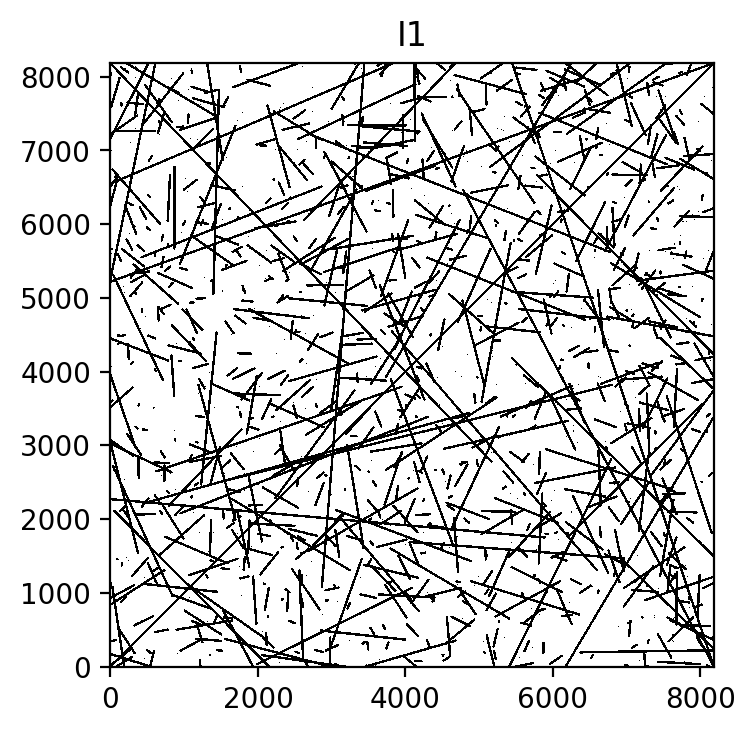

In [911]:
f = plt.figure(figsize=(4,4),dpi=200)
plt.imshow(img_1024, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.title('I1')
plt.show()

### (2.) Simulate 2 new images I2 and I3 of size 512 × 512 and 256 × 256 pixels respectively. I2 and I3 are down-sampled version of I1 and are generated by shortening the N line segments in I1 by 50% and 25% respectively (discard lines shorter than 1).

In [916]:
img_512 = img_bw_2
img_512s = img_bw_2
color = 0
thickness_scale = 4*4
thickness_fine = 2
for i in np.arange(N):
    if L[i] >= 4:
        x1 = int(x[i] + (L[i]/2)*np.cos(theta[i]))
        y1 = int(y[i] + (L[i]/2)*np.sin(theta[i]))
        x2 = int(x[i] - (L[i]/2)*np.cos(theta[i]))
        y2 = int(y[i] - (L[i]/2)*np.sin(theta[i]))

        x1 = np.maximum(0,np.minimum(x1,b))
        y1 = np.maximum(0,np.minimum(y1,b))
        x2 = np.maximum(0,np.minimum(x2,b))
        y2 = np.maximum(0,np.minimum(y2,b))

        line = cv2.line(img_bw_1, (x1,y1), (x2,y2), color, thickness_scale)
        img_512 = img_512 + line
        line = cv2.line(img_bw_1, (x1,y1), (x2,y2), color, thickness_fine)
        img_512_s = img_512_s + line

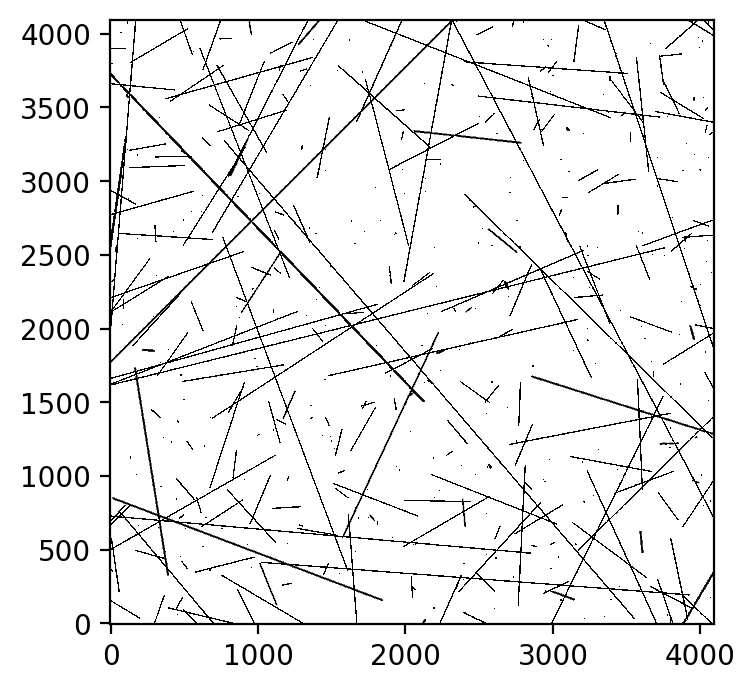

In [880]:
half_window = (np.int((b+1)/2))
start_pixel_x = np.random.randint(half_window)
start_pixel_y = np.random.randint(half_window)
img_512_zoom = img_512[start_pixel_x:start_pixel_x+half_window,start_pixel_y:start_pixel_y+half_window]
img_512_zoom_s = img_512_s[start_pixel_x:start_pixel_x+half_window,start_pixel_y:start_pixel_y+half_window]

f = plt.figure(figsize=(4,4),dpi=200)
plt.imshow(img_512_zoom, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.show()

In [888]:
img_256 = img_bw_3
color = 0
thickness = 2*3
for i in np.arange(N):
    if L[i] >= 2:
        x1 = int(x[i] + (L[i]/2)*np.cos(theta[i]))
        y1 = int(y[i] + (L[i]/2)*np.sin(theta[i]))
        x2 = int(x[i] - (L[i]/2)*np.cos(theta[i]))
        y2 = int(y[i] - (L[i]/2)*np.sin(theta[i]))

        x1 = np.maximum(0,np.minimum(x1,b))
        y1 = np.maximum(0,np.minimum(y1,b))
        x2 = np.maximum(0,np.minimum(x2,b))
        y2 = np.maximum(0,np.minimum(y2,b))

        line = cv2.line(img_bw_1, (x1,y1), (x2,y2), color, thickness)
        img_256 = img_256 + line

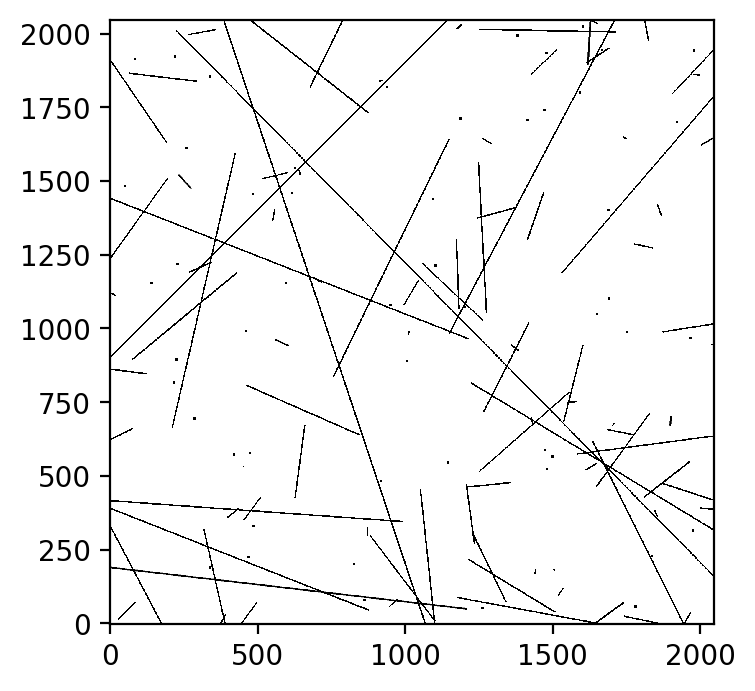

In [889]:
quarter_window = (np.int((b+1)/4))
start_pixel_x = np.random.randint(3*quarter_window)
start_pixel_y = np.random.randint(3*quarter_window)
img_256_zoom = img_256[start_pixel_x:start_pixel_x+quarter_window,start_pixel_y:start_pixel_y+quarter_window]

f = plt.figure(figsize=(4,4),dpi=200)
plt.imshow(img_256_zoom, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.show()

### (3.) Crop 2 image patches of size 128×128 pixels randomly from each of the three images I1, I2, I3 respectively. Plot these six images [draw the line segments in black on white background].

In [902]:
print(np.shape(img_1024))
print(np.shape(img_512_zoom))
print(np.shape(img_256_zoom))

(8192, 8192)
(4096, 4096)
(2048, 2048)


In [930]:
frac = 7
window = 1024
start_pixel_x = np.random.randint(window*frac)
start_pixel_y = np.random.randint(window*frac)
img_1024_128_1 = img_1024_s[start_pixel_x:start_pixel_x+window,start_pixel_y:start_pixel_y+window]
start_pixel_x = np.random.randint(window*frac)
start_pixel_y = np.random.randint(window*frac)
img_1024_128_2 = img_1024_s[start_pixel_x:start_pixel_x+window,start_pixel_y:start_pixel_y+window]

window = 512
start_pixel_x = np.random.randint(window*frac)
start_pixel_y = np.random.randint(window*frac)
img_512_128_1 = img_512_zoom_s[start_pixel_x:start_pixel_x+window,start_pixel_y:start_pixel_y+window]
start_pixel_x = np.random.randint(window*frac)
start_pixel_y = np.random.randint(window*frac)
img_512_128_2 = img_512_zoom_s[start_pixel_x:start_pixel_x+window,start_pixel_y:start_pixel_y+window]

window = 256
start_pixel_x = np.random.randint(window*frac)
start_pixel_y = np.random.randint(window*frac)
img_256_128_1 = img_256_zoom[start_pixel_x:start_pixel_x+window,start_pixel_y:start_pixel_y+window]
start_pixel_x = np.random.randint(window*frac)
start_pixel_y = np.random.randint(window*frac)
img_256_128_2 = img_256_zoom[start_pixel_x:start_pixel_x+window,start_pixel_y:start_pixel_y+window]

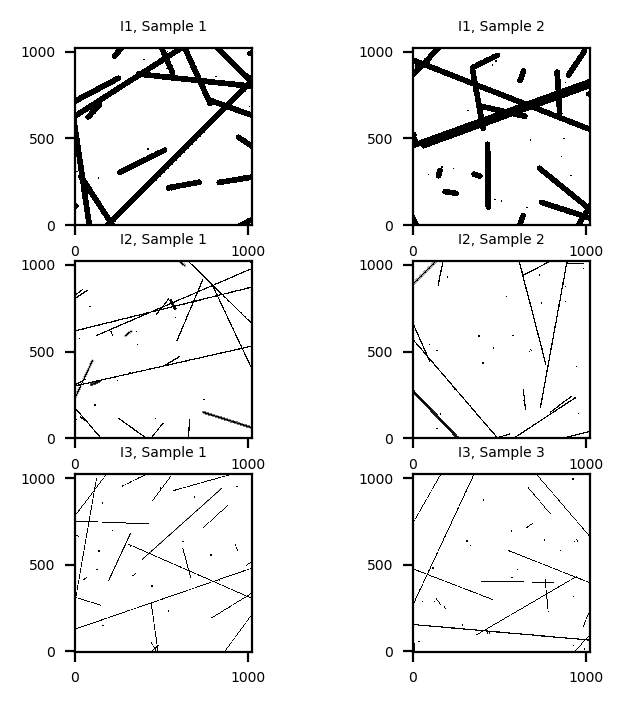

In [921]:
f = plt.figure(figsize=(4,4),dpi=200)
plt.subplot(321)
plt.imshow(img_1024_128_1, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title('I1, Sample 1',size=5)

plt.subplot(322)
plt.imshow(img_1024_128_2, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.title
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title('I1, Sample 2',size=5)

plt.subplot(323)
plt.imshow(img_512_128_1, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title('I2, Sample 1',size=5)

plt.subplot(324)
plt.imshow(img_512_128_2, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title('I2, Sample 2',size=5)

plt.subplot(325)
plt.imshow(img_256_128_1, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title('I3, Sample 1',size=5)

plt.subplot(326)
plt.imshow(img_256_128_2, cmap='gray', vmin=0, vmax=31)
plt.gca().invert_yaxis()
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title('I3, Sample 3',size=5)

plt.show()

### Note: The line thicknesses are different, due to some funkiness with Open CV, but otherwise the images are quite similar.